**link colab : https://colab.research.google.com/drive/11UvWmN2qzFJDqw45b2_DyhjcIxk5EMnf?usp=sharing**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##read data

In [2]:
df = pd.read_csv('/content/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##pre-processing

In [5]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [6]:
for i in df.columns:
    df[i] = df[i].astype('category')
    print(df[i].value_counts())
    print('='*50)

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In [7]:
df.drop(columns='veil-type', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

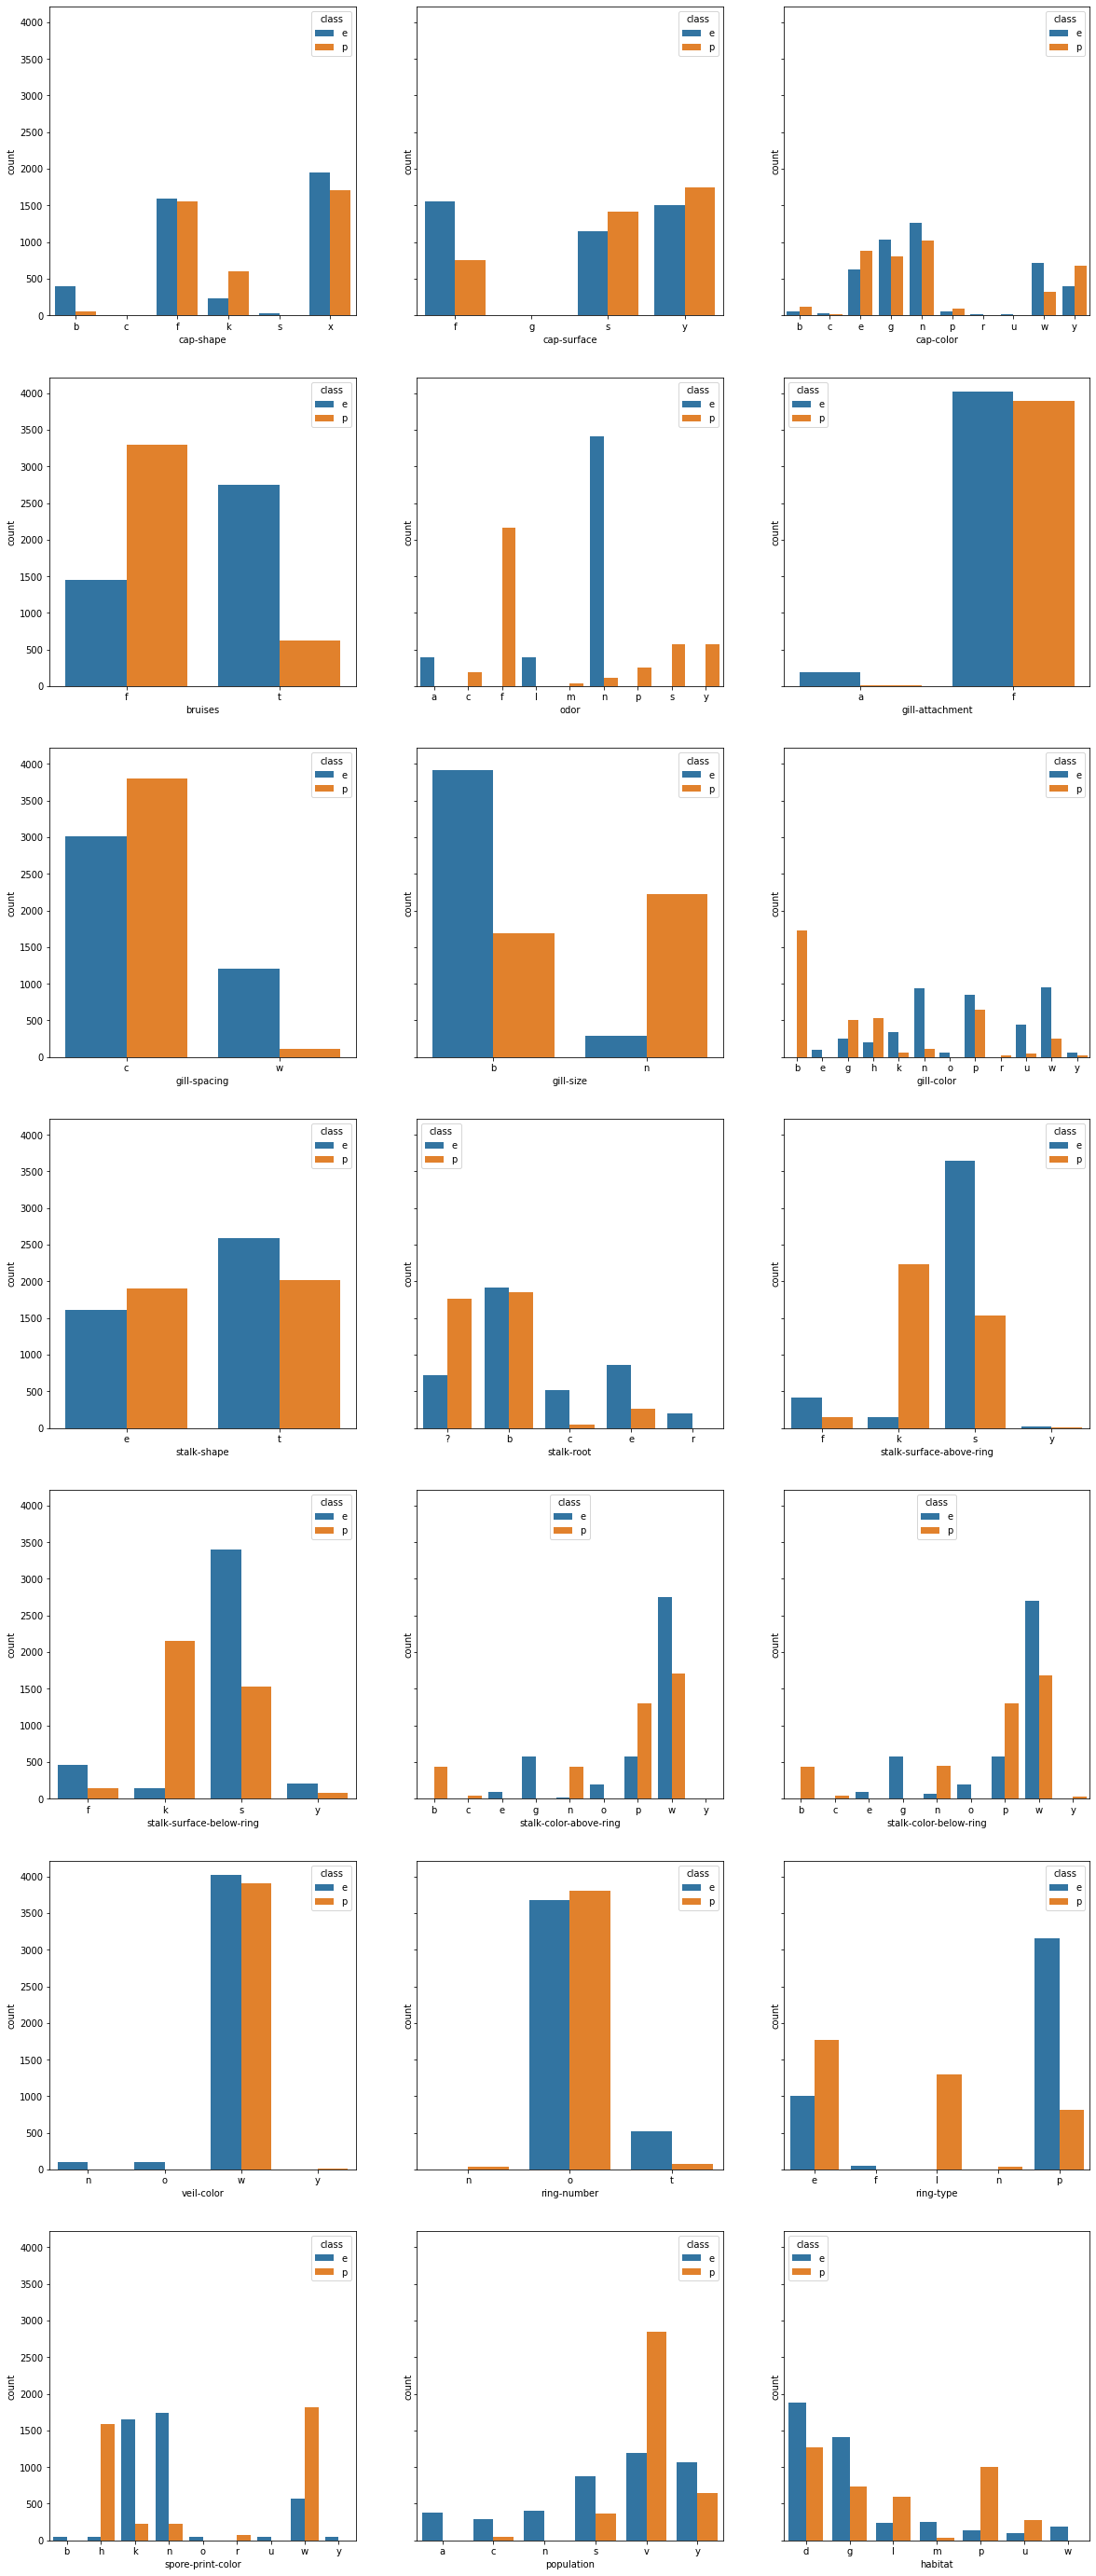

In [8]:
fig, axes = plt.subplots(nrows=7,ncols=3, figsize=(20,50),sharey=True)
idx = 0
for col in df.columns[1:]:
    sns.countplot(data=df,x=col, hue='class' ,ax=axes[idx//3][idx%3])
    idx += 1

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df = df.apply(le.fit_transform)

##train test split

In [10]:
x = df.iloc[:,1:].values
y = df['class'].values
x[0:5]

array([[5, 2, 4, 1, 6, 1, 0, 1, 4, 0, 3, 2, 2, 7, 7, 2, 1, 4, 2, 3, 5],
       [5, 2, 9, 1, 0, 1, 0, 0, 4, 0, 2, 2, 2, 7, 7, 2, 1, 4, 3, 2, 1],
       [0, 2, 8, 1, 3, 1, 0, 0, 5, 0, 2, 2, 2, 7, 7, 2, 1, 4, 3, 2, 3],
       [5, 3, 8, 1, 6, 1, 0, 1, 5, 0, 3, 2, 2, 7, 7, 2, 1, 4, 2, 3, 5],
       [5, 2, 3, 0, 5, 1, 1, 0, 4, 1, 3, 2, 2, 7, 7, 2, 1, 0, 3, 0, 1]])

In [11]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

##DecisionTree Gini

In [14]:
from sklearn.tree import DecisionTreeClassifier
mushroomTree = DecisionTreeClassifier()
mushroomTree

DecisionTreeClassifier()

In [15]:
mushroomTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier()

In [16]:
predTree = mushroomTree.predict(X_testset)

In [17]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


In [25]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testset,predTree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1279
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [19]:
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from six import StringIO

from sklearn.tree import export_graphviz
import pydot 

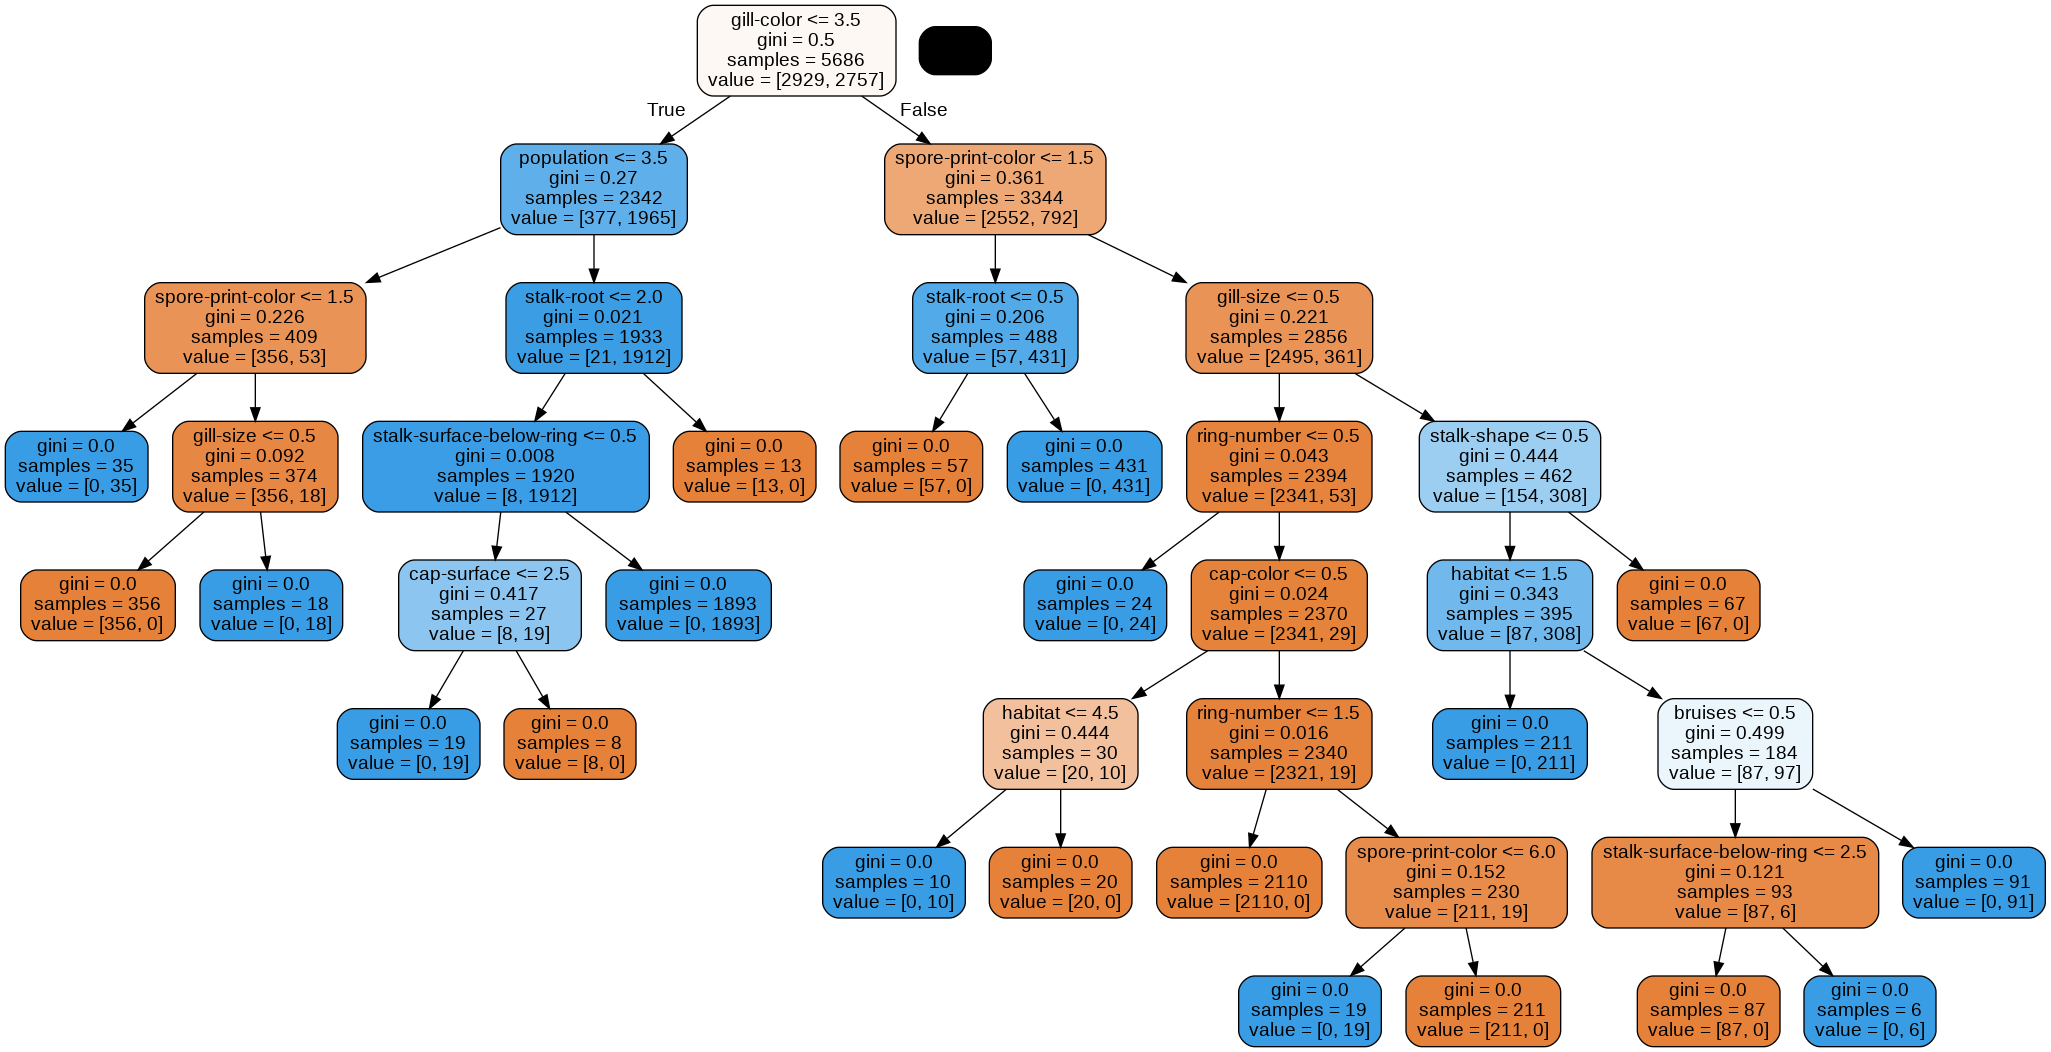

In [21]:
dot_data = StringIO()  
features = list(df.columns[1:])
export_graphviz(mushroomTree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

##RandomForest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_trainset, y_trainset)

RandomForestClassifier()

In [23]:
rfc_pred = rfc.predict(X_testset)

In [26]:
print(confusion_matrix(y_testset,rfc_pred))

[[1279    0]
 [   0 1159]]


In [33]:
print(classification_report(y_testset,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1279
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



##DecisionTree entropy

In [34]:
from sklearn.tree import DecisionTreeClassifier
mushroomTreeEntropy = DecisionTreeClassifier(criterion  = 'entropy')
mushroomTreeEntropy

DecisionTreeClassifier(criterion='entropy')

In [35]:
mushroomTreeEntropy.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy')

In [36]:
predTreeEntropy = mushroomTreeEntropy.predict(X_testset)

In [37]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTreeEntropy))

DecisionTrees's Accuracy:  1.0


In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testset,predTreeEntropy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1279
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

